In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## Image matching by Block Comparaing 

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

Method:

Squared Difference (pixels):  

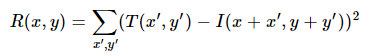

In [4]:
# donload the image 
!wget -P '/' 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
!mv 'Lenna_(test_image).png' 'Lenna.png'

--2023-04-06 12:06:02--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

enna_(test_image).p 100%[===================>] 462.73K  2.29MB/s    in 0.2s    

2023-04-06 12:06:03 (2.29 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



## prepare your template





*   Download the lenna image into your PC, and choose the crop you want from the image, name it as tempalte.png
*   Uplad the template into colab once again, and execute the following code 




In [5]:
#load the image and the search template
img = cv.imread('Lenna.png',0)
img2 = img.copy()
template = cv.imread('template.jpeg',0)
w, h = template.shape[::-1]

AttributeError: ignored

In [ ]:
# Apply template Matching
res = cv.matchTemplate(img,template,cv.TM_SQDIFF)

# check the map of matching
plt.imshow(res,cmap = 'gray')

In [6]:
# find the position of the best matching score:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

NameError: ignored

In [7]:
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img2,top_left, bottom_right, 255, 2)
plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(121), plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
cv.rectangle(img2,top_left, bottom_right, 255, 2)
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: ignored

# Compare results of 6 methods

In [8]:
# All the 6 methods for comparison in a list

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    # 
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #
    #
    #
    plt.suptitle(meth)
    plt.show()
  

error: ignored

In [ ]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    # Create a copy of the image to draw the rectangle
    img2 = img.copy()

    # Set the method to be used for comparison
    method = eval(meth)

    # Apply template Matching
    res = cv.matchTemplate(img,template,method)

    # Get the location of the minimum and maximum values in the result matrix
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Calculate the bottom right coordinate of the rectangle
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw the rectangle on the image copy
    cv.rectangle(img2, top_left, bottom_right, 255, 2)

    # Display the result
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# Advanced Matching (using rebust keypoints features)
This method works because the template is of the same size of search block (in terms of scale). Similarly, the template is viewed at the same viewing angle and are not rotated.

If the template differed in scale or the viewing angle (or both of them ) from the image, or two images of similar object were taked form different point of view, the method would fail. Such as the following example

![picture](https://learnopencv.com/wp-content/uploads/2018/03/image-alignment-using-opencv.jpg)


![picture](https://learnopencv.com/wp-content/uploads/2016/01/homography-example-768x511.jpg)


## Now we would have to match an object with multiple objects within image (search the object, recognize it ..)

![picture](https://drive.google.com/uc?id=1Zq7kao8YUyLAC_mldjbdNWE0AcVwUDNm)![picture](https://drive.google.com/uc?id=1IhHNPRIcYTIr0Ajk7fk7w8xiSbt2gmoY)


Try it
Rotate and scale slightly one of images:

In [9]:
!wget -P '/' 'https://i.stack.imgur.com/Er7vx.png'
!mv 'Er7vx.png' 'box.png'

!wget -P '/' 'https://i.stack.imgur.com/gAz96.png'
!mv 'gAz96.png' 'box_in_scene.png'

--2023-04-06 12:06:05--  https://i.stack.imgur.com/Er7vx.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.40.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.40.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘Er7vx.png’

r7vx.png            100%[===================>]  49.54K   324KB/s    in 0.2s    

2023-04-06 12:06:06 (324 KB/s) - ‘Er7vx.png’ saved [50728/50728]

--2023-04-06 12:06:06--  https://i.stack.imgur.com/gAz96.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.40.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.40.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122490 (120K) [image/png]
Saving to: ‘gAz96.png’

Az96.png            100%[===================>] 119.62K   401KB/s    in 0.3s    

2023-04-06 12:06:07 (401 KB/s) - ‘gAz96.png’ saved [122490/122490]



In [10]:
MIN_MATCH_COUNT = 10
img1 = cv.imread('box.png',0)          # queryImage
img2 = cv.imread('box_in_scene.png',0) # trainImage


# Initiate SIFT detector
sift = cv.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# #feature matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
# The FLANN (Fast Approximate Nearest Neighbors) algorithm is used to quickly find approximate nearest neighbors between the two sets of descriptors
# to calculate the list of preference of each point
flann = cv.FlannBasedMatcher(index_params, search_params) 

matches = flann.knnMatch(des1,des2,k=2)


# store all the good matches as per Lowe's ratio test.
good = []
coeff = 0.7  # how much point robust infrom the list of good points  try to change

for m,n in matches:
    if m.distance < coeff*n.distance:
        good.append(m)

print(len(good))

74


This Python code is using the SIFT algorithm and FLANN-based matching to find matching keypoints between two images and then filter out "good" matches using Lowe's ratio test. Here's a detailed breakdown of what's happening:

First, the SIFT algorithm is initiated by creating a SIFT object using cv.SIFT_create(). Then, the detectAndCompute method is used to find the keypoints and descriptors for each of the two input images (img1 and img2), with kp1 and kp2 representing the keypoint locations and des1 and des2 representing the corresponding descriptors.


Next, the FLANN algorithm is used to match the keypoints between the two images. First, the parameters for the FLANN index and search are set up. FLANN_INDEX_KDTREE specifies the type of indexing algorithm to use (a KD tree in this case), while trees sets the number of trees in the index. search_params sets the number of checks to perform when finding the nearest neighbors. Then, a FlannBasedMatcher object is created using the index and search parameters. Finally, the knnMatch method is used to find the k=2 nearest matches between the two sets of descriptors, which are stored in the matches variable.

Finally, the matches are filtered using Lowe's ratio test. For each match in matches, the ratio of the distance to the nearest neighbor (n) to the distance to the second nearest neighbor (m) is calculated. If this ratio is below a threshold of coeff (0.7 in this case), then the match is considered "good" and added to the good list. The length of the good list is then printed to the console. This represents the number of good matches found between the two input images.

In [11]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # cv2.findHomography is a function in the OpenCV library that computes a homography matrix given a set of corresponding points in two images. 
    # The homography matrix is a 3x3 transformation matrix that maps points in one image to the corresponding points in the other image.
    
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    #that indicates which of the input points were used to compute the homography matrix. It is useful to see if points contain outliers or errors,
    # 
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

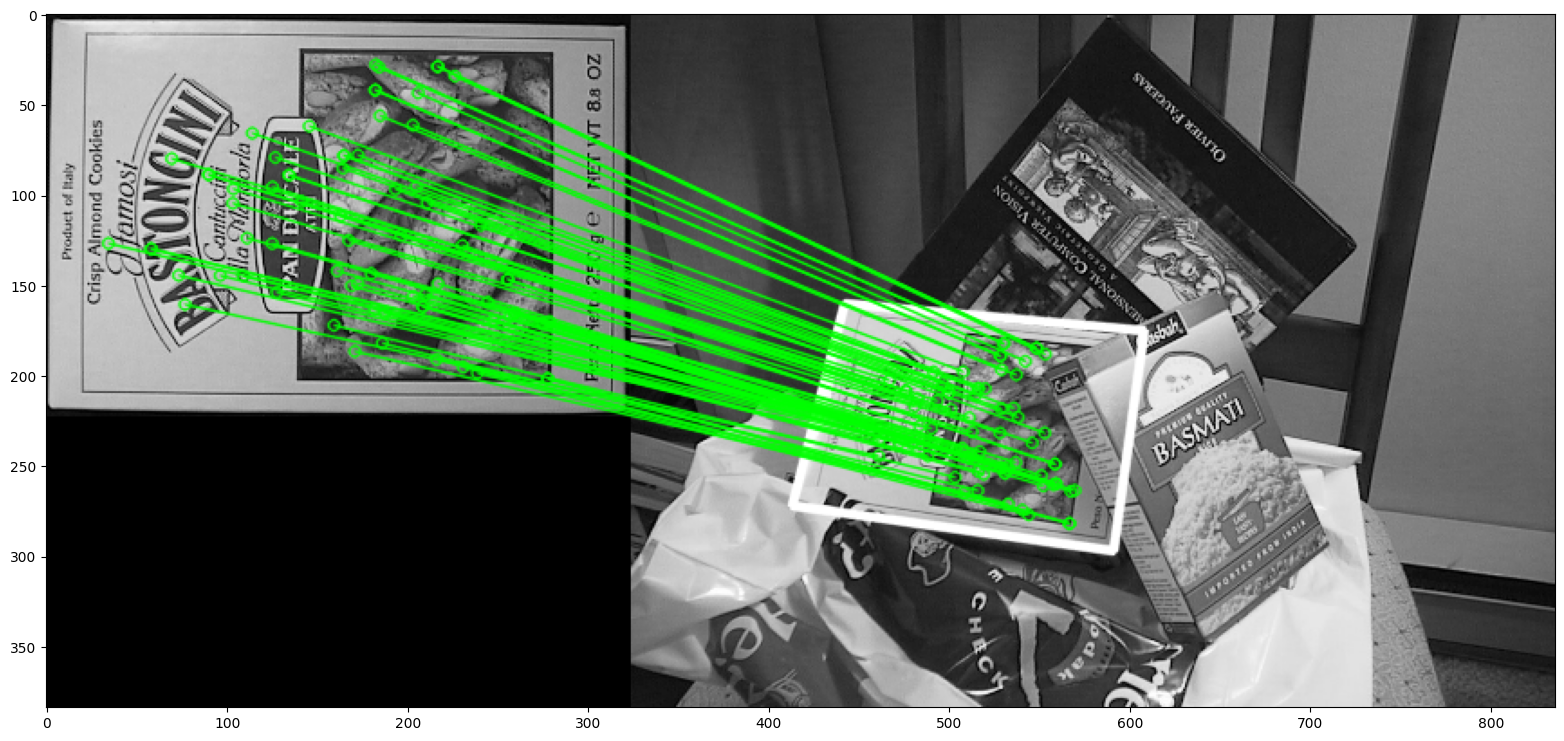

(<matplotlib.image.AxesImage at 0x7fa1284c4100>, None)

In [12]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure(figsize=(20, 9))
plt.imshow(img3, 'gray'),plt.show()

## Transform image to overlay on the image of scene (if perfect matching

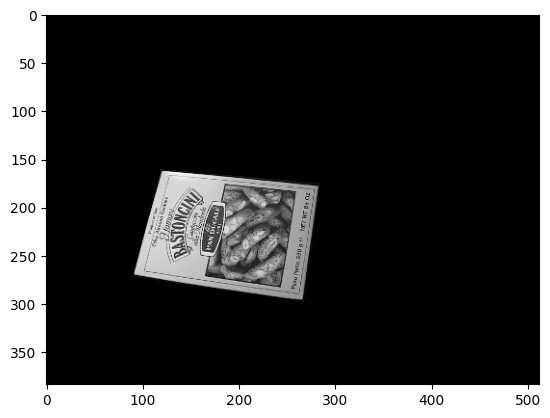

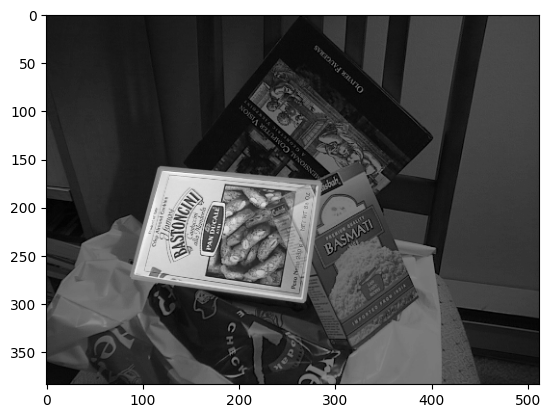

(<matplotlib.image.AxesImage at 0x7fa1282dfdc0>, None)

In [13]:

im_dst = cv.warpPerspective(img1, M, [img2.shape[1],img2.shape[0]])
plt.imshow(im_dst, 'gray'),plt.show()
    
alpha = 0.5
beta = 1 - alpha
blended = cv.addWeighted(im_dst, alpha, img2, beta, 1.0)
plt.imshow(blended, 'gray'),plt.show()

# Compare Between two approaches

## References

Homography: https://learnopencv.com/homography-examples-using-opencv-python-c/


Understanding SIFT: https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

SURF: https://medium.com/data-breach/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e

In [16]:
# donload the image 
!wget -P '/' 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Tour_Eiffel_Wikimedia_Commons.jpg/260px-Tour_Eiffel_Wikimedia_Commons.jpg'
!mv '260px-Tour_Eiffel_Wikimedia_Commons.jpg.1' 'EffeilTower.png'

# donload the image 
!wget -P '/' 'https://www.larousse.fr/encyclopedie/data/images/1313802-La_tour_Eiffel.jpg'
!mv '1313802-La_tour_Eiffel.jpg' 'EffeilTower2.png'

--2023-04-06 12:08:09--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Tour_Eiffel_Wikimedia_Commons.jpg/260px-Tour_Eiffel_Wikimedia_Commons.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26473 (26K) [image/jpeg]
Saving to: ‘260px-Tour_Eiffel_Wikimedia_Commons.jpg.1’

60px-Tour_Eiffel_Wi 100%[===================>]  25.85K  --.-KB/s    in 0.1s    

2023-04-06 12:08:10 (197 KB/s) - ‘260px-Tour_Eiffel_Wikimedia_Commons.jpg.1’ saved [26473/26473]

--2023-04-06 12:08:10--  https://www.larousse.fr/encyclopedie/data/images/1313802-La_tour_Eiffel.jpg
Resolving www.larousse.fr (www.larousse.fr)... 51.144.190.143
Connecting to www.larousse.fr (www.larousse.fr)|51.144.190.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21929 (21K) [image/jpeg]
Saving to: ‘13

In [23]:
MIN_MATCH_COUNT = 10
img1 = cv.imread('EffeilTower.png',0)          # queryImage
img2 = cv.imread('EffeilTower2.png',0) # trainImage


# Initiate SIFT detector
sift = cv.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# #feature matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
# The FLANN (Fast Approximate Nearest Neighbors) algorithm is used to quickly find approximate nearest neighbors between the two sets of descriptors
# to calculate the list of preference of each point
flann = cv.FlannBasedMatcher(index_params, search_params) 

matches = flann.knnMatch(des1,des2,k=2)


# store all the good matches as per Lowe's ratio test.
good = []
coeff = 0.8  # how much point robust infrom the list of good points  try to change

for m,n in matches:
    if m.distance < coeff*n.distance:
        good.append(m)

print(len(good))

14


In [24]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # cv2.findHomography is a function in the OpenCV library that computes a homography matrix given a set of corresponding points in two images. 
    # The homography matrix is a 3x3 transformation matrix that maps points in one image to the corresponding points in the other image.
    
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    #that indicates which of the input points were used to compute the homography matrix. It is useful to see if points contain outliers or errors,
    # 
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

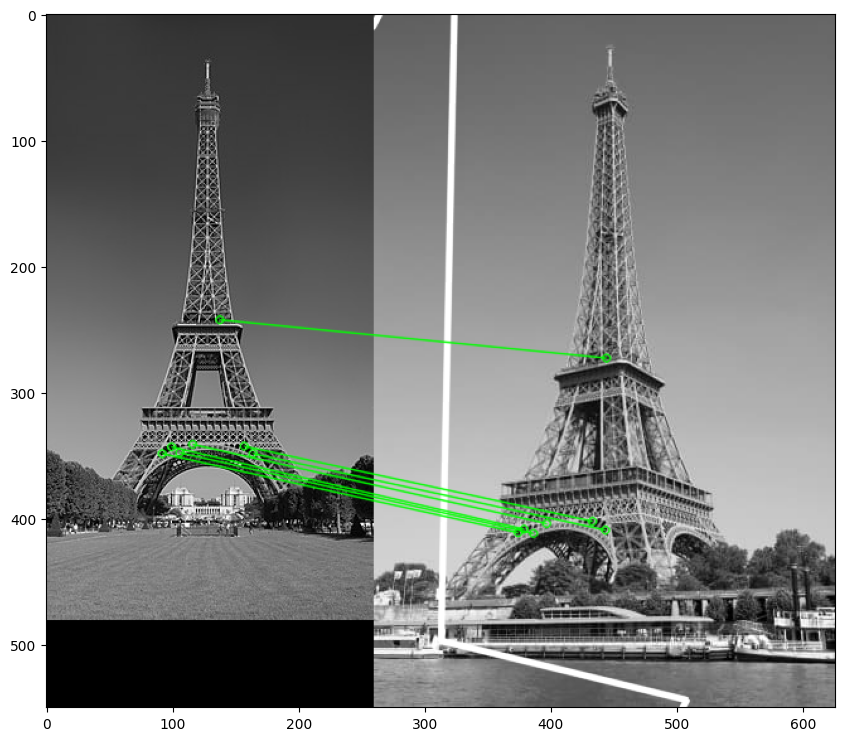

(<matplotlib.image.AxesImage at 0x7fa128127100>, None)

In [25]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure(figsize=(20, 9))
plt.imshow(img3, 'gray'),plt.show()

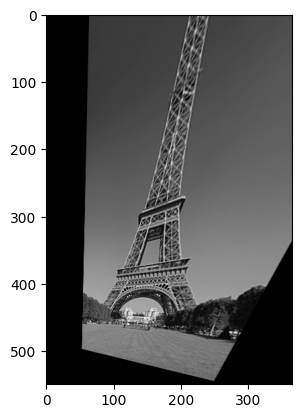

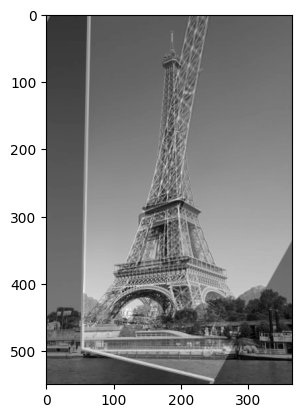

(<matplotlib.image.AxesImage at 0x7fa1280806a0>, None)

In [26]:
im_dst = cv.warpPerspective(img1, M, [img2.shape[1],img2.shape[0]])
plt.imshow(im_dst, 'gray'),plt.show()
    
alpha = 0.5
beta = 1 - alpha
blended = cv.addWeighted(im_dst, alpha, img2, beta, 1.0)
plt.imshow(blended, 'gray'),plt.show()